In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.weightstats import ztest

enem_sp = pd.read_csv('/Users/paull/OneDrive/Área de Trabalho/LEONARDO/python/jupyter/enem_2019_tratado.csv',
                     sep = ',', encoding = 'iso-8859-1')

In [2]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [3]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]
colegiox.shape

(41, 24)

# Passos para começar uma análise de dados

1) Observar os dados disponíveis e seus formatos

In [4]:
colegiox.dtypes


NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar se tem algum valor nulo

In [5]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analise de Outlier

<AxesSubplot:ylabel='NOTA_REDACAO'>

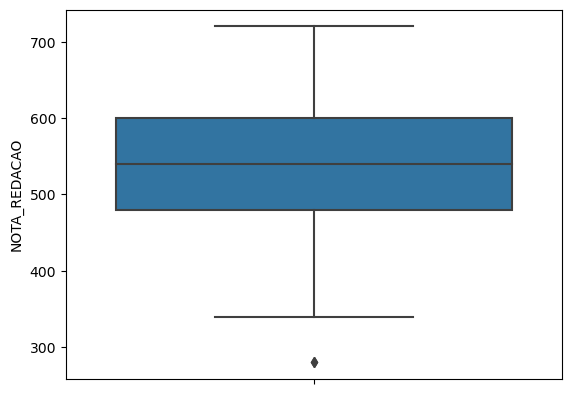

In [6]:
sns.boxplot(data=colegiox, y="NOTA_REDACAO")

4) Analise de Normarlidade

<AxesSubplot:xlabel='NOTA_REDACAO', ylabel='Probability'>

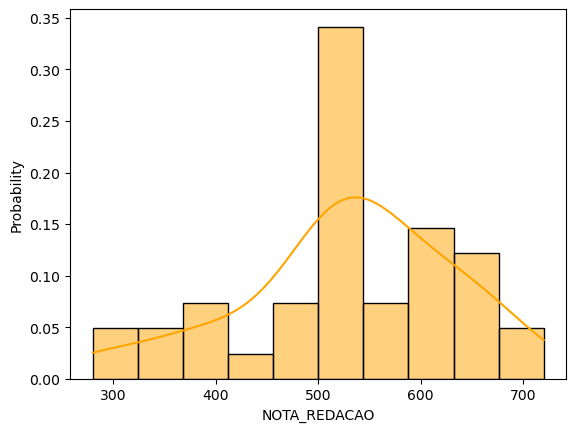

In [7]:
sns.histplot(colegiox, x='NOTA_REDACAO', bins = 10, color = "orange", kde = True, stat = "probability")

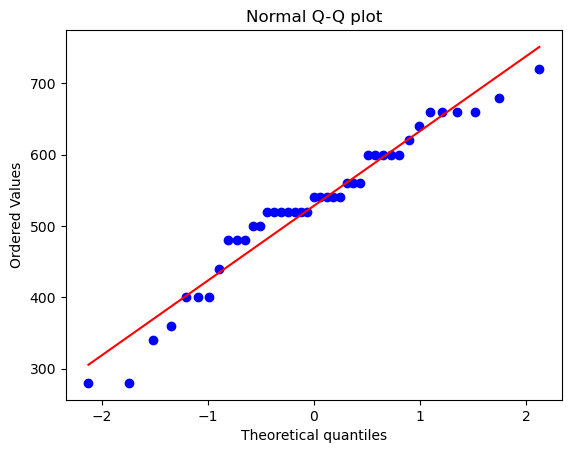

In [8]:
stats.probplot(colegiox['NOTA_REDACAO'], dist = "norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

CRITÉRIOS:
NÍVEL DE SIGNICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)
QUANDO p > 0,05 (distribuição normal).

In [9]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox.NOTA_REDACAO)

ShapiroResult(statistic=0.9529756903648376, pvalue=0.08905091136693954)

In [10]:
# Teste Lilliefors (Kolmogorov_Smirnov)
statsmodels.stats.diagnostic.lilliefors(colegiox.NOTA_REDACAO, dist = 'norm')

(0.15115505856545197, 0.020310301942343047)

In [11]:
# Teste Anderson-Darling
stats.anderson(colegiox.NOTA_REDACAO, 'norm')

AndersonResult(statistic=0.6984616237351489, critical_values=array([0.532, 0.606, 0.727, 0.848, 1.009]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# TESTE Z

Média das notas do colégiox comparada ao estado de São Paulo
Ho: Média é igual a de São Paulo (p > 0,05)
Ha: Média é diferente da de São Paulo (p <= 0,05)

In [12]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [13]:
stat, p = ztest(colegiox['NOTA_REDACAO'], value = 593.0183221986639)
print('Estatística de teste:{}'.format(stat.round(2)))
print('p-valor:{}'.format(p))

Estatística de teste:-3.98
p-valor:6.764690422432806e-05


In [14]:
colegiox.NOTA_REDACAO.describe() 

count     41.000000
mean     528.292683
std      104.016884
min      280.000000
25%      480.000000
50%      540.000000
75%      600.000000
max      720.000000
Name: NOTA_REDACAO, dtype: float64

# Interpretação

Teste estatístico: z = -3,93
p_valor = 6.76e-05

Ho: Média é igual a de São Paulo (p > 0,05)
Ha: Média é diferente da de São Paulo (p <= 0,05)

Conclusão: Estatistivcamente, a média do colégio x é diferente da média do Estado de São Paulo, com intervalo de confiança de 95%.